In [1]:
import numpy as np
import pandas as pd
from pandas import plotting

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
init_notebook_mode(connected = True)
import plotly.figure_factory as ff

In [2]:
data = pd.read_csv('ml_course-master/9. Обучение без учителя/data/digits.csv')
data.head(2)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca = PCA(n_components=2, random_state=27)
scaled_data = StandardScaler().fit_transform(
    X=data.drop(["label"], axis=1)
)
pca_data = pca.fit_transform(scaled_data)

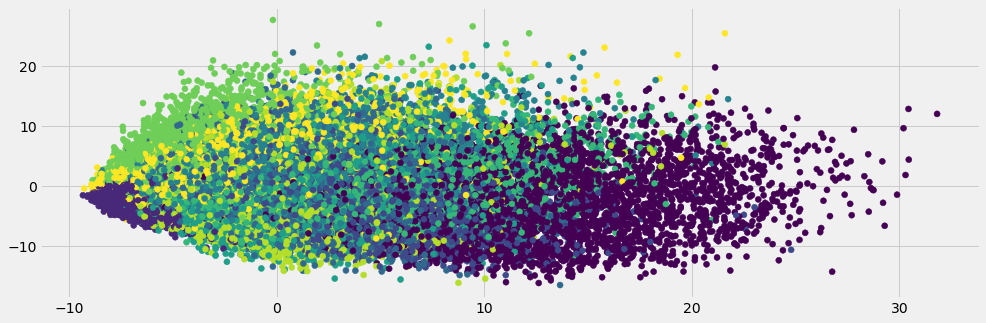

In [5]:
fig = plt.figure(figsize=(15, 5))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=data["label"], cmap="viridis")

In [6]:
np.sum(pca.explained_variance_ratio_)

0.0985964436013457

In [7]:
pca_data.shape

(42000, 2)

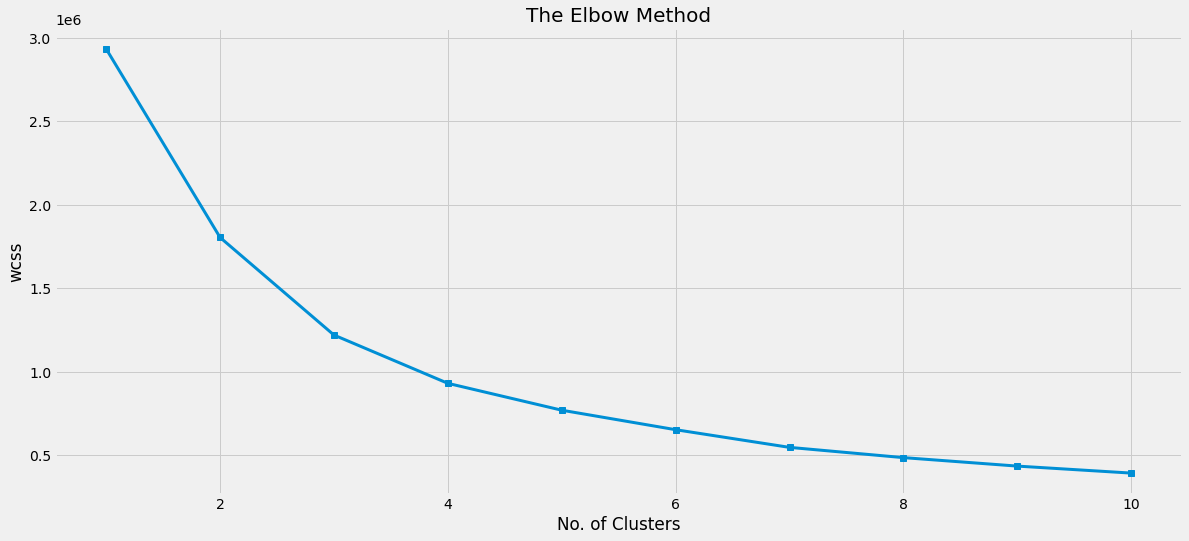

In [9]:
from sklearn.cluster import KMeans

wcss=[]
for i in range(1, 11):
    km=KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(pca_data)
    wcss.append(km.inertia_)
plt.rcParams['figure.figsize'] = (18, 8)    
plt.plot(range(1, 11), wcss, linewidth=3, marker='s')
plt.title('The Elbow Method', fontsize=20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [10]:
import umap

In [11]:
fit = umap.UMAP(n_neighbors=5, min_dist=0.3, metric='correlation')
%time u = fit.fit_transform(data)

Wall time: 37.3 s


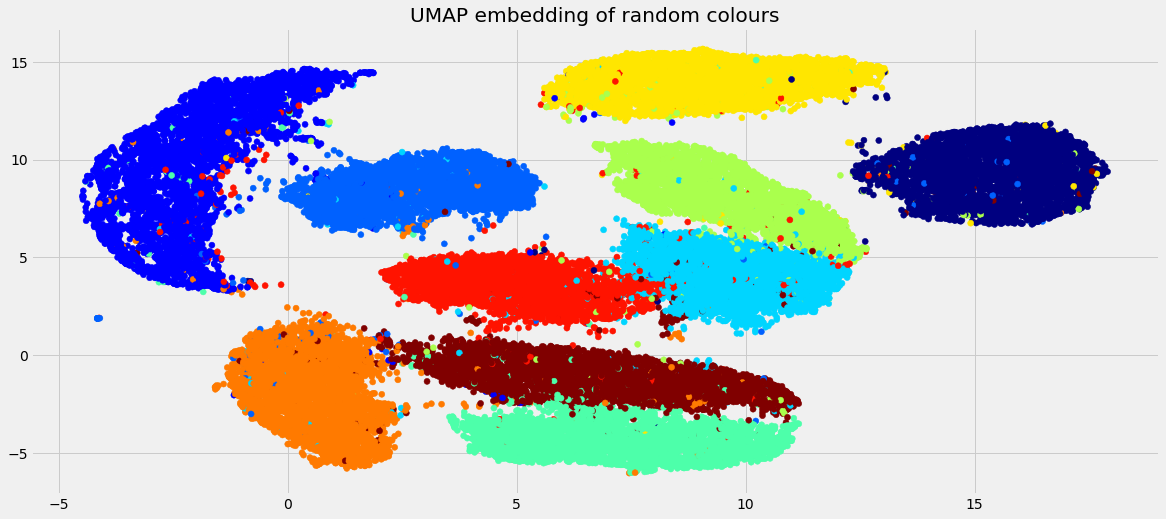

In [23]:
plt.scatter(u[:,0], u[:,1], c=data['label'], cmap="jet")
plt.title('UMAP embedding of random colours')
plt.show() 